# THỰC HÀNH 4: PHÂN VÙNG ẢNH

## 1. CÀI ĐẶT THƯ VIỆN


In [1]:
%pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 289.3 kB/s eta 0:02:15
    --------------------------------------- 0.5/39.5 MB 289.3 kB/s eta 0:02:15
    --------------------------------------- 0.5/39.5 MB 289.3 kB/s eta 0:02:15
    --------------------------------------- 0.5/39.5 MB 289.3 kB/s eta 0:02:15
    --------------------------------------- 0.5/39.5 M

## 2. VIẾT CHƯƠNG TRÌNH PHÂN VÙNG ẢNH


### 2.1. Phân vùng theo histogram

#### 2.1.1. Phương pháp Otsu

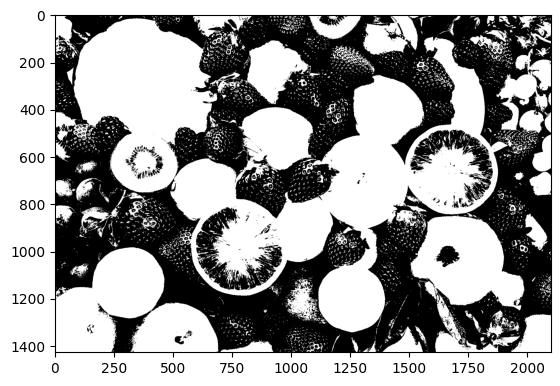

In [15]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
# Mở ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('fruit.jpg').convert('L')
a = np.asarray(data)
# Thực hiện phương pháp ngưỡng hóa Otsu (Otsu's thresholding)
thres = threshold_otsu (a)
# Giữ lại các pixel có cường độ lớn hơn ngưỡng
b = a > thres
b = a > thres
b = Image.fromarray (b)
plt.imshow(b)
plt.show()


#### 2.1.2. Phương pháp Adaptive Thresholding


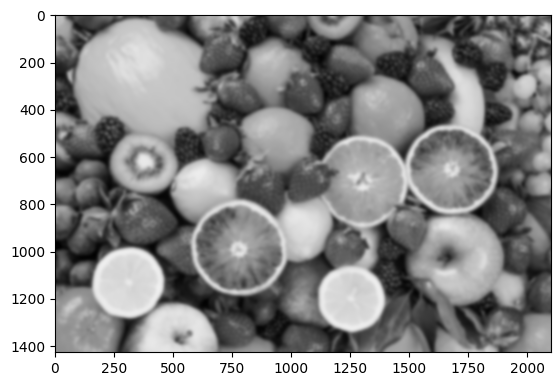

In [35]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local
data = Image.open('fruit.jpg').convert('L')
a = np.asarray (data)
# Thực hiện phương pháp ngưỡng hóa Otsu (Otsu's thresholding)
b = threshold_local (a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow (b)
plt.show ()

### 2.2. Phân vùng theo region


In [1]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# Đọc ảnh và chuyển sang ảnh xám (grayscale)
data = cv2.imread('fruit.jpg')
a = cv2.cvtColor (data, cv2.COLOR_BGR2GRAY)
# Ngưỡng hóa ảnh (thresholding) để lấy các pixel thuộc về đối tượng (cell)
thresh, bl = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# Vì phương pháp Otsu có thể phân đoạn quá mức, nên thực hiện phép co (erosion) để giảm nhiễu
b2 = cv2.erode (bl, None, iterations = 2)
# Áp dụng biến đổi khoảng cách (distance transform)
dist_trans = cv2.distanceTransform (b2, 2, 3)

# Ngưỡng hóa ảnh distance transform để lấy các pixel nền trước (foreground)
thresh, dt = cv2.threshold (dist_trans, 1, 255, cv2.THRESH_BINARY)
# Gán nhãn (labeling) cho các vùng foreground
labelled, ncc = label (dt)
# Chuyển kiểu dữ liệu sang số nguyên 32-bit để phục vụ thuật toán watershed
labelled = labelled.astype (np.int32)
# Thực hiện phân đoạn bằng thuật toán watershed
cv2.watershed(data, labelled)
b = Image.fromarray (labelled)
plt.imshow (b)
plt.show ()


ModuleNotFoundError: No module named 'cv2'

### 2.3 Biến đổi đối tượng trong ảnh 

#### 2.3.1. Sử dụng binary_dilation

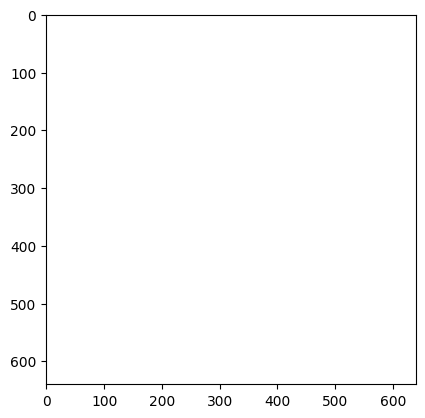

In [ ]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# Mở ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('dil_img.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)
c= Image.fromarray(b)
c.show()
plt.imshow (c)
plt.show ()

#### 2.3.2. Sử dụng binary_opening


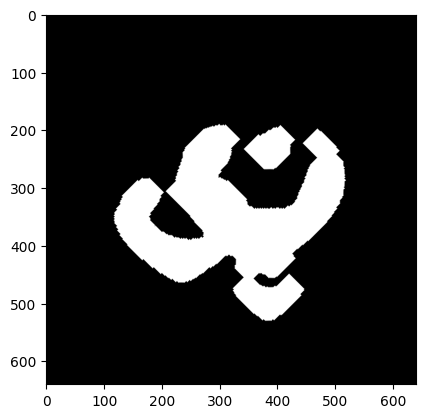

In [14]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# Mở ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('dil_img.gif').convert('L')
# Định nghĩa phần tử cấu trúc (structuring element)
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening (data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show ()
plt.imshow(c)
plt.show ()


#### 2.3.3. Sử dụng binary_erosion


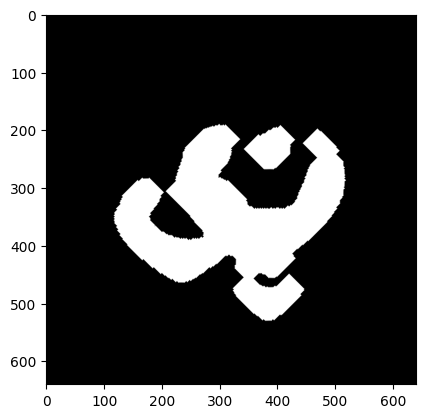

In [12]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
# Mở ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('dil_img.gif').convert('L')
# Định nghĩa phần tử cấu trúc (structuring element)
S = [[0, 1, 0], [1, 1, 1], [0, 1, 0]] 
b = nd.binary_erosion (data, structure=s, iterations=50)
C = Image.fromarray (b)
c.show()
plt.imshow(c)
plt.show()

#### 2.3.4. Sử dụng binary_closing

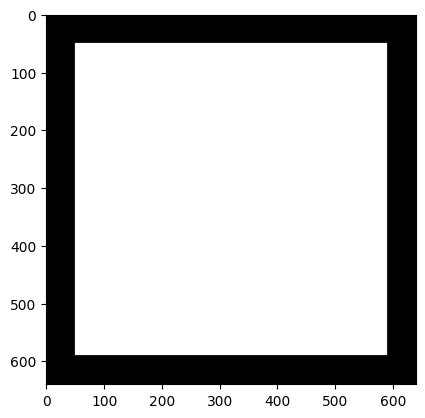

In [7]:
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local
## Mở ảnh và chuyển sang ảnh xám (grayscale)
data = Image.open('dil_img.gif').convert('L')
# Định nghĩa phần tử cấu trúc
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing (data, structure=s, iterations=50)
c = Image.fromarray (b)
c.show ()
plt.imshow(c)
plt.show ()


## Bài tập

### 1. Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng LangBiang theo ngưỡng 0.3. Lưu vào máy với tên lang_biang.jpg và hiển thị trên màn hình.

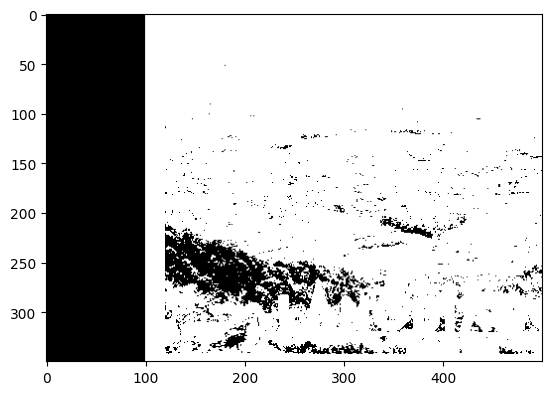

In [6]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
data1 = iio.imread('exercise/dalat.jpg')
bmg = data1 [0:350,0:500]
iio.imsave("langBiang.jpg", bmg)
# Đọc ảnh đã cắt và chuyển sang ảnh xám (grayscale)
data2 = Image.open('langBiang.jpg').convert('L')
a = np.asarray(data2).astype(np.float32)
# Tịnh tiến ảnh sang phải 100px
bdata = nd.shift(a, shift=(0, 100), order=0, mode='constant', cval=0)
# plt.imshow (bdata)
# Thực hiện phương pháp ngưỡng hóa Otsu 0.3 
a_norm = bdata/255
b = a_norm > 0.3
plt.imshow(b, cmap='gray')
plt.show()
# Chuyển sang kiểu uint8 để lưu (0 hoặc 255)
b_uint8 = (b * 255).astype(np.uint8)
# Lưu ảnh ra file
iio.imsave('lang_biang.jpg', b_uint8)

### 2. Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là ho_xuan_huong.jpg.

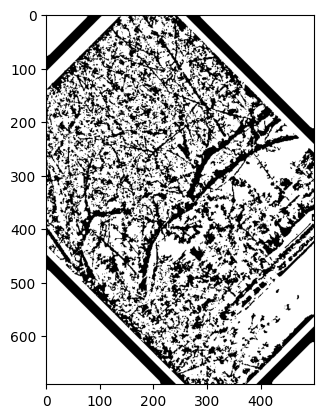

In [37]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu
data1 = iio.imread('exercise/dalat.jpg')
bmg = data1 [0:690, 500: 1000]
iio.imsave("hoXuanHuong.jpg", bmg)
# Đọc ảnh đã cắt và chuyển sang ảnh xám (grayscale)
data2 = Image.open('hoXuanHuong.jpg').convert('L')
a = np.asarray(data2).astype(np.float32)
#  Xoay ảnh
d1 = nd.rotate (a, 45, reshape=False)
# plt.imshow (d1)
# Thực hiện phương pháp ngưỡng hóa Otsu 60 (Otsu's thresholding)
# Ở đây dùng block_size=61 (phải là số lẻ), offset=10
b = threshold_local (d1, block_size=61, offset=10)
binary_result = d1 > b
plt.imshow (binary_result, cmap='gray')
plt.show ()

# Chuyển sang kiểu uint8 để lưu (0 hoặc 255)
b_uint8 = (b * 255).astype(np.uint8)
# Lưu ảnh ra file
iio.imsave('ho_xuan_huong.jpg', b_uint8)


### 3. Viết chương trình chọn Quản trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg.

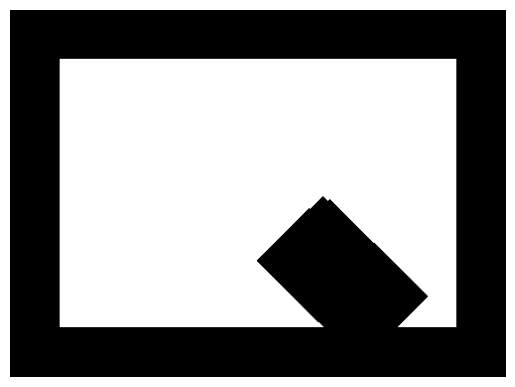

In [12]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters.thresholding import threshold_otsu

# Đọc ảnh và cắt vùng Quảng trường Lâm Viên
data1 = iio.imread('exercise/dalat.jpg')
bmg = data1[0:370, 1000:1500]
iio.imsave("qtLamVien.jpg", bmg)

# Chuyển sang ảnh xám (grayscale)
data2 = Image.open('qtLamVien.jpg').convert('L')
a = np.asarray(data2).astype(np.float32)

# Coordinate Mapping (biến dạng nhẹ)
V, H = a.shape
M = np.indices((V, H)).astype(np.float32)
d = 5
q = 2 * d * np.random.ranf(M.shape).astype(np.float32) - d
mp = M + q
d1 = nd.map_coordinates(a, mp, order=1, mode='reflect')

# Ngưỡng hóa Otsu
threshold = threshold_otsu(d1)
d1_bin = d1 > threshold

# Binary Closing
s = np.array([[0, 1, 0],
              [1, 1, 1],
              [0, 1, 0]], dtype=np.uint8)
b = nd.binary_closing(d1_bin, structure=s, iterations=50)

# Hiển thị ảnh
plt.imshow(b, cmap='gray')
plt.axis('off')
plt.show()

# Lưu ảnh ra file (0 hoặc 255)
b_uint8 = (b * 255).astype(np.uint8)
iio.imsave('quan_truong_lam_vien.jpg', b_uint8)




### 4. Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment)


==== Danh sách chức năng xử lý ảnh ====
├── geometric_transformation
│   ├── coordinate_mapping
│   ├── Rotate
│   ├── Scale
│   └── Shift
└── segment
    ├── Adaptive_thresholding
    ├── Binary_dilation
    ├── Binary_erosion
    └── Otsu


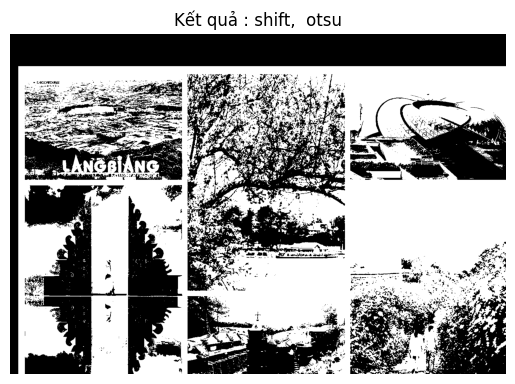

In [15]:
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
from skimage.filters import threshold_local, threshold_otsu

# ==== Các phép biến đổi hình học ====
def coordinate_mapping(im_np):
    if im_np.ndim == 2:
        channels = [im_np]
    else:
        channels = [im_np[:, :, i] for i in range(3)]
    V, H = channels[0].shape
    M = np.indices((V, H))
    d = 5
    q = 2 * d * np.random.ranf(M.shape) - d
    mp = (M + q).astype(int)
    for i in range(2):
        mp[i] = np.clip(mp[i], 0, channels[0].shape[i] - 1)
    mapped_channels = [nd.map_coordinates(ch, mp) for ch in channels]
    return np.stack(mapped_channels, axis=2).astype(np.uint8) if len(mapped_channels) > 1 else mapped_channels[0].astype(np.uint8)

def Rotate(im_np):
    return nd.rotate(im_np, 20, reshape=False)

def Shift(im_np):
    if im_np.ndim == 2:
        return nd.shift(im_np, (100, 25), order=0)
    else:
        return np.stack([nd.shift(im_np[:, :, i], (100, 25), order=0) for i in range(3)], axis=2)

def phongTo(im_np):
    return nd.zoom(im_np, 2) if im_np.ndim == 2 else nd.zoom(im_np, (2, 2, 1))

def thuNho(im_np):
    return nd.zoom(im_np, 0.5) if im_np.ndim == 2 else nd.zoom(im_np, (0.5, 0.5, 1))

# ==== Phân đoạn ảnh ====
def Adaptive_thresholding(im_np):
    gray = to_grayscale(im_np)
    b = threshold_local(gray, 39, offset=10)
    return ((gray > b) * 255).astype(np.uint8)

def Binary_dilation(im_np):
    gray = to_grayscale(im_np)
    binary = gray > 128
    dilated = nd.binary_dilation(binary, iterations=5)
    return (dilated * 255).astype(np.uint8)

def Binary_erosion(im_np):
    gray = to_grayscale(im_np)
    binary = gray > 128
    s = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])
    eroded = nd.binary_erosion(binary, structure=s, iterations=5)
    return (eroded * 255).astype(np.uint8)

def Otsu(im_np):
    gray = to_grayscale(im_np)
    thres = threshold_otsu(gray)
    binary = gray > thres
    return (binary * 255).astype(np.uint8)

# ==== Hàm hỗ trợ: chuyển sang ảnh xám ====
def to_grayscale(im_np):
    if im_np.ndim == 3:
        return np.mean(im_np, axis=2).astype(np.uint8)
    return im_np

# ==== Cây thư mục chức năng ====
tree_data = {
    "geometric_transformation": {
        "coordinate_mapping": {},
        "Rotate": {},
        "Scale": {},
        "Shift": {}
    },
    "segment": {
        "Adaptive_thresholding": {},
        "Binary_dilation": {},
        "Binary_erosion": {},
        "Otsu": {}
    }
}

def print_tree(data, prefix=""):
    keys = list(data.keys())
    for i, key in enumerate(keys):
        is_last = (i == len(keys) - 1)
        connector = "└── " if is_last else "├── "
        print(prefix + connector + key)
        new_prefix = prefix + ("    " if is_last else "│   ")
        if isinstance(data[key], dict):
            print_tree(data[key], new_prefix)

# ==== Map tên tới hàm ====
func_map = {
    "coordinate_mapping": coordinate_mapping,
    "Rotate": Rotate,
    "Scale": phongTo,
    "Shift": Shift,
    "Adaptive_thresholding": Adaptive_thresholding,
    "Binary_dilation": Binary_dilation,
    "Binary_erosion": Binary_erosion,
    "Otsu": Otsu
}

# ==== Chương trình chính ====
print("==== Danh sách chức năng xử lý ảnh ====")
print_tree(tree_data)

choices = input("\nNhập 1 hoặc 2 tên chức năng cách nhau bằng dấu phẩy (ví dụ: Rotate, Otsu): ").strip().split(',')

img_np = iio.imread('exercise/dalat.jpg')

# Áp dụng lần lượt các hàm
img_result = img_np
for ch in choices:
    ch = ch.strip().capitalize()
    if ch in func_map:
        img_result = func_map[ch](img_result)
    else:
        print(f"[!] Không tìm thấy chức năng: {ch}")

# Luôn chuyển kết quả về ảnh xám để hiển thị
gray_result = to_grayscale(img_result)

# Hiển thị kết quả ảnh xám
plt.imshow(gray_result, cmap='gray')
plt.title(f"Kết quả : {', '.join(choices)}")
plt.axis('off')
plt.show()
